In [2]:
import openweathermapy.core as owm
import requests
from citipy import citipy
from pprint import pprint
import pandas as pd
import random
from config import api_key
import matplotlib.pyplot as plt

**Create a list of random cities**

# this code kills the kernel, what I did wrong?
cities = {}

def onemoreloop():
    return citylistcreator()

def citylistcreator():
    for x in range(500):
        coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
        citydata = citipy.nearest_city(*coord)
        city = citydata.city_name
        if city not in cities:
            cities[city] = coord
        else:
            try:
                return onemoreloop()
            except(RecursionError):
                return onemoreloop()

citylistcreator()
print(len(cities))

In [18]:
# This works fine, but the output number is unpredictable

cities = {}

for x in range(50):
    coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
    citydata = citipy.nearest_city(*coord)
    city = citydata.city_name
    #if city not in cities: Not necessary, because of using dictionary
        #cities[city] = coord
    #else:
        #pass
    cities[city] = coord

print(len(cities))

39


**Retrieve cities data from openweathermap using Requests. Create a DataFrame**

In [22]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

all_requests_data = {}
counter = 1 # City number counter
abcent_cities = 0 # Counter for the cities that are not in the openweather database

for city in cities:
    
    pure_city_name = city
    city = requests.utils.quote(city, safe='') # Make a city name readable (percent-encoded)
    ind_url = f'{url}appid={api_key}&units={units}&q={city}'
    # The line below is blocked, not to show the api_key
    #print(f'Now processing: city number {counter}, name {pure_city_name}\n{ind_url}')
    data_json = requests.get(ind_url).json()
    
    try:
        all_requests_data[data_json['name']] = [data_json['sys']['country'], data_json['coord']['lat'], 
                                              data_json['main']['temp'], data_json['main']['humidity'],
                                              data_json['clouds']['all'], data_json['wind']['speed'], data_json['dt']]
    except(KeyError):
        print(f'There is no city {pure_city_name} in openweathermap database')
        abcent_cities +=1
        pass
    counter += 1
    
print(f'{abcent_cities} cities were skipped')
print(f'{len(all_requests_data)} cities data was captured')

There is no city taolanaro in openweathermap database
There is no city illoqqortoormiut in openweathermap database
There is no city amderma in openweathermap database
There is no city fevralsk in openweathermap database
There is no city belushya guba in openweathermap database
5 cities were skipped
34 cities data was captured


In [47]:
dframe_json = pd.DataFrame(all_requests_data)
final_req_df = dframe_json.transpose()
final_req_df.columns = ['Country', 'Latitude', 'Temperature(F)', 'Humidity(%)', 'Cloudiness(%)', 'Wind Speed(MpH)',
                        'Date']
print(final_req_df.count())
final_req_df.head()

Country            34
Latitude           34
Temperature(F)     34
Humidity(%)        34
Cloudiness(%)      34
Wind Speed(MpH)    34
Date               34
dtype: int64


,Country,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(MpH),Date
Acari,BR,-6.44,82.91,69,48,10.42,1522170237
Albany,US,42.65,42.8,28,90,10.29,1522166220
Bardsir,IR,29.93,68,8,0,6.93,1522166400
Bluff,AU,-23.58,73.19,72,0,10.54,1522170237
Bredasdorp,ZA,-34.53,75.2,57,24,10.29,1522166400


**Retrieve cities data from openweathermap using openweathermapy. Create a DataFrame**

**Here and below I use metric system because Farenheits sound like Sanskrit for me**

In [25]:
settings = {"units": "metric", "appid": api_key} 

In [39]:
import urllib

all_owm_data = []
abcent_cities = 0

for city in cities:
    try:
        all_owm_data.append(owm.get_current(city, **settings))
    except urllib.error.HTTPError:
        print(f'There is no city {city} in openweathermap database')
        abcent_cities += 1
        pass
        
print(f'{abcent_cities} cities were skipped')
print(f'{len(all_owm_data)} cities data was captured')

There is no city taolanaro in openweathermap database
There is no city illoqqortoormiut in openweathermap database
There is no city amderma in openweathermap database
There is no city fevralsk in openweathermap database
There is no city belushya guba in openweathermap database
5 cities were skipped
34 cities data was captured


In [48]:
search = ['name', 'sys.country', 'coord.lat', 'main.temp','main.humidity', 'clouds.all', 'wind.speed', 'dt']
extracted_data = [city(*search) for city in all_owm_data]

final_owm_df = pd.DataFrame(extracted_data)
final_owm_df.columns = ['Name','Country', 'Latitude', 'Temperature(C)', 'Humidity(%)', 'Cloudiness(%)',
                        'Wind Speed(MpH)', 'Date']
final_owm_df.head()

,Name,Country,Latitude,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed(MpH),Date
0,Port Alfred,ZA,-33.59,24.43,77,12,6.46,1522172283
1,Khatanga,RU,71.98,-37.50,0,0,2.06,1522172284
2,Goderich,CA,43.74,5.08,96,92,11.71,1522172278
3,Sitka,US,37.17,8.61,74,92,7.06,1522172278
4,Grand Forks,US,47.91,2.60,98,1,4.60,1522170900


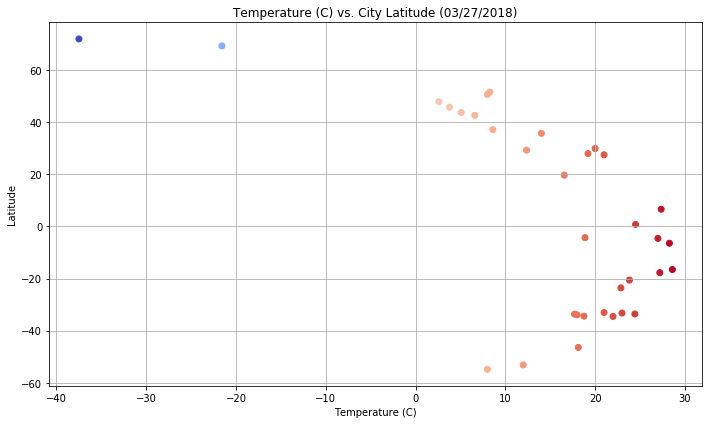

In [49]:
import datetime
current_date = datetime.datetime.now().date().strftime("%m/%d/%Y")
plt.figure(figsize=(10,6))
plt.scatter(final_owm_df['Temperature(C)'], final_owm_df['Latitude'], c=final_owm_df['Temperature(C)'], cmap='coolwarm')
plt.ylabel('Latitude')
plt.xlabel('Temperature (C)')
plt.title(f'Temperature (C) vs. City Latitude ({current_date})')
plt.tight_layout()
plt.grid()

AttributeError: 'tuple' object has no attribute 'xlabel'

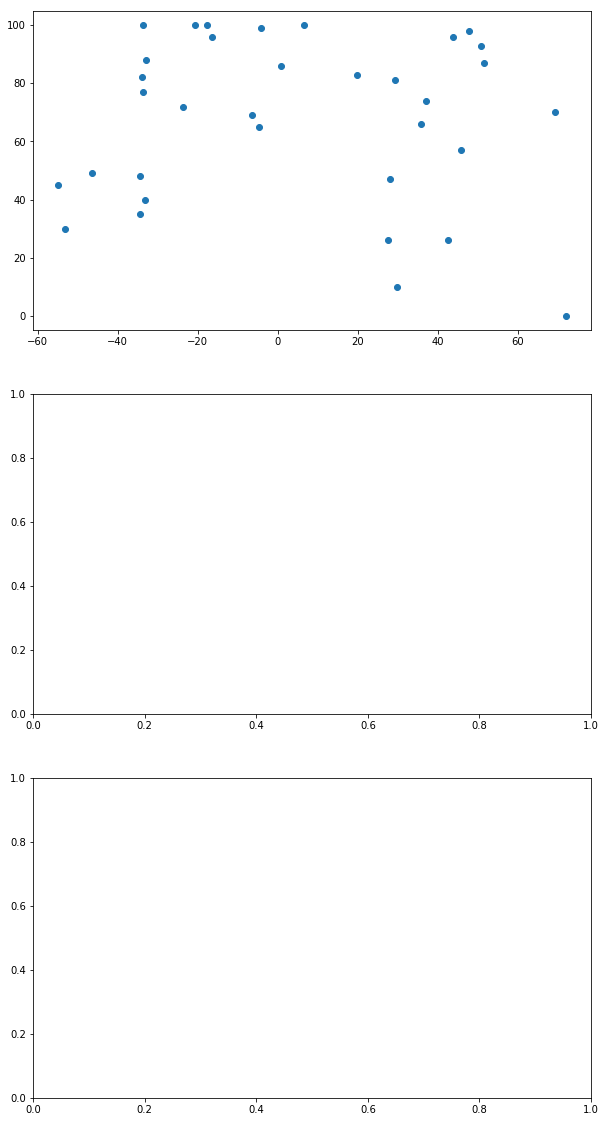

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False)
#ax1.set_xlim(min(df_weather['Latitude'])-16, max(df_weather['Latitude'])+20)
fig.set_size_inches(10,20)

ax1.scatter(final_owm_df['Latitude'], final_owm_df['Humidity(%)'])
(ax1,ax2,ax3).xlabel('Latitude')

ax2.scatter(final_owm_df['Latitude'], final_owm_df['Cloudiness(%)'])

ax3.scatter(final_owm_df['Latitude'], final_owm_df['Wind Speed(MpH)'])

(-65, 87.5183466988508)

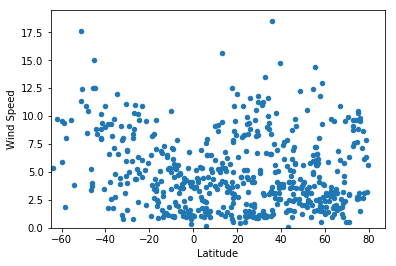

In [200]:
df.plot(kind='scatter', x='Latitude', y='Wind Speed')
plt.ylim(0, None)
plt.xlim(-65, None)